In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer



# Load the preprocessed dataset
data = pd.read_csv("dataset/Activity.csv")

# Define the feature and target variables
X = data.drop(columns=['UserID', 'Date', 'Calories_Burned'])  # Features
y = pd.cut(data['Calories_Burned'], bins=3, labels=['Low', 'Medium', 'High'])  # Target variable with 3 classes: Low, Medium, High


In [2]:
data.dtypes

UserID                          int64
Date                           object
Total_Distance                float64
Tracker_Distance              float64
Logged_Activities_Distance    float64
Very_Active_Distance          float64
Moderately_Active_Distance    float64
Light_Active_Distance         float64
Sedentary_Active_Distance     float64
Very_Active_Minutes             int64
Fairly_Active_Minutes           int64
Lightly_Active_Minutes          int64
Sedentary_Minutes               int64
Steps                           int64
Calories_Burned                 int64
dtype: object

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UserID                      940 non-null    int64  
 1   Date                        940 non-null    object 
 2   Total_Distance              940 non-null    float64
 3   Tracker_Distance            940 non-null    float64
 4   Logged_Activities_Distance  940 non-null    float64
 5   Very_Active_Distance        940 non-null    float64
 6   Moderately_Active_Distance  940 non-null    float64
 7   Light_Active_Distance       940 non-null    float64
 8   Sedentary_Active_Distance   940 non-null    float64
 9   Very_Active_Minutes         940 non-null    int64  
 10  Fairly_Active_Minutes       940 non-null    int64  
 11  Lightly_Active_Minutes      940 non-null    int64  
 12  Sedentary_Minutes           940 non-null    int64  
 13  Steps                       940 non

In [4]:
data.shape

(940, 15)

In [5]:
data.describe(include="all")

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
unique,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/13/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.855407e+09,NaN,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,7637.910638,2303.609574
std,2.424805e+09,NaN,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,5087.150742,718.166862
min,1.503960e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,NaN,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,3789.750000,1828.500000
50%,4.445115e+09,NaN,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,7405.500000,2134.000000
75%,6.962181e+09,NaN,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,10727.000000,2793.250000


In [7]:
data.head()

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
0,6117666160,4/20/2016,8.02,8.02,0.0,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536
1,1644430081,4/13/2016,5.82,5.82,0.0,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902
2,1927972279,4/25/2016,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100
3,6117666160,4/26/2016,7.21,7.21,0.0,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450
4,4388161847,5/9/2016,7.86,7.86,0.0,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013


In [8]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
print("Missing values before preprocessing:")
print(data.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'
data.iloc[:, 2:] = imputer.fit_transform(data.iloc[:, 2:])

# Check for duplicate rows
print("Duplicate rows before preprocessing:", data.duplicated().sum())

# Drop duplicate rows
data.drop_duplicates(inplace=True)

# Feature scaling
scaler = StandardScaler()
data[['Total_Distance', 'Steps', 'Calories_Burned']] = scaler.fit_transform(data[['Total_Distance', 'Steps', 'Calories_Burned']])

# Check the first few rows after preprocessing
print(data.head())

Missing values before preprocessing:
UserID                        0
Date                          0
Total_Distance                0
Tracker_Distance              0
Logged_Activities_Distance    0
Very_Active_Distance          0
Moderately_Active_Distance    0
Light_Active_Distance         0
Sedentary_Active_Distance     0
Very_Active_Minutes           0
Fairly_Active_Minutes         0
Lightly_Active_Minutes        0
Sedentary_Minutes             0
Steps                         0
Calories_Burned               0
dtype: int64
Duplicate rows before preprocessing: 0
       UserID       Date  Total_Distance  Tracker_Distance  \
0  6117666160 2016-04-20        0.645070              8.02   
1  1644430081 2016-04-13        0.084206              5.82   
2  1927972279 2016-04-25       -1.371492              0.11   
3  6117666160 2016-04-26        0.438570              7.21   
4  4388161847 2016-05-09        0.604280              7.86   

   Logged_Activities_Distance  Very_Active_Distance  \
0  

In [13]:
y.head()

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
Name: Calories_Burned, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [10]:



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.776595744680851

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.56      0.71        18
         Low       0.52      0.31      0.39        35
      Medium       0.80      0.93      0.86       135

    accuracy                           0.78       188
   macro avg       0.77      0.60      0.65       188
weighted avg       0.76      0.78      0.76       188



In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


y = data['Calories_Burned']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit MinMaxScaler to 'Calories_Burned' in training data
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

# Transform 'Calories_Burned' in testing data using the same scaler
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train_scaled)

# Predict on the test set
y_pred_scaled = regressor.predict(X_test)

# Inverse transform the predicted values to get actual 'Calories_Burned'
y_pred = scaler.inverse_transform(y_pred_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 145097.9224097261
R-squared Score: 0.7133841242726442


In [22]:
from xgboost import XGBRegressor




y = data['Calories_Burned']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost regressor
regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 163296.09868249853
R-squared Score: 0.6774367713234208


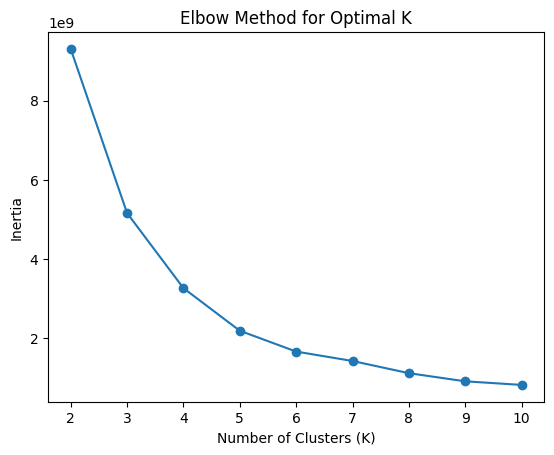

Cluster Centers:
   Total_Distance  Tracker_Distance  Logged_Activities_Distance  \
0        8.450432          8.412326                2.410872e-01   
1        1.164692          1.164692                9.714451e-17   
2        4.831310          4.831310                5.756104e-02   
3       16.060465         16.013488                2.272776e-01   

   Very_Active_Distance  Moderately_Active_Distance  Light_Active_Distance  \
0              2.622259                    1.133189               4.589203   
1              0.054731                    0.049346               1.022269   
2              0.604583                    0.383750               3.774018   
3              9.438372                    1.177442               5.236279   

   Sedentary_Active_Distance  Very_Active_Minutes  Fairly_Active_Minutes  \
0                   0.001462            39.990033              26.780731   
1                   0.000577             1.584615               1.584615   
2                   0.002321

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X = data.drop(columns=['UserID', 'Date'])

# Decide the number of clusters (K)
k_values = range(2, 11)  # Experiment with different values of K
inertia_values = []  # To store the inertia (within-cluster sum of squares) for each K

# Perform K-Means clustering for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal K
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the elbow curve, choose the optimal K and perform clustering
optimal_k = 4  # Example: optimal K from the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Display the cluster centers
print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=X.columns))

# Display the distribution of samples in each cluster
print("\nDistribution of Samples in Each Cluster:")
print(data['Cluster'].value_counts())


C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. for

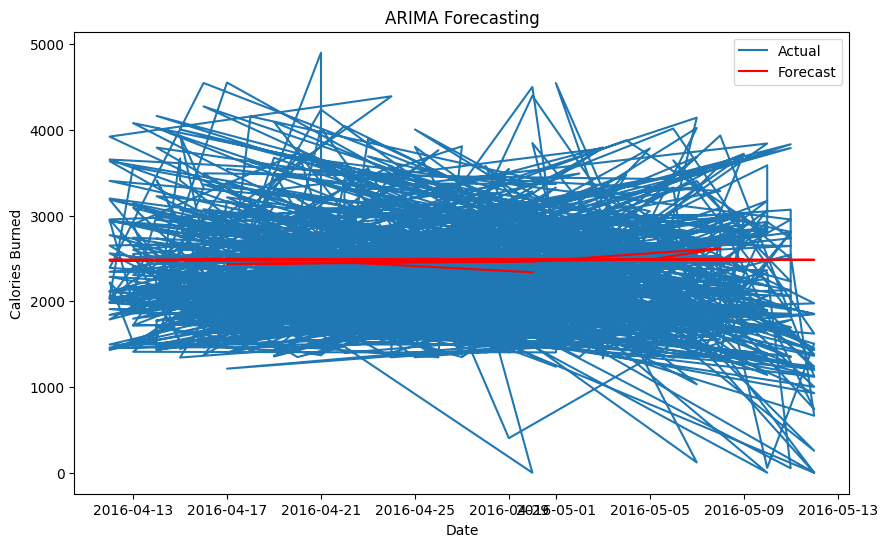

Root Mean Squared Error (RMSE): 726.8765873642249


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime


# Convert 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract the 'Calories_Burned' column as the time series data
ts_data = data['Calories_Burned']

# Split the data into training and testing sets
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data[:train_size], ts_data[train_size:]

# Define and fit the ARIMA model
order = (5, 1, 0)  # Example order (p, d, q)
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Forecast future values
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test_data, forecast))

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(ts_data.index, ts_data, label='Actual')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Calories Burned')
plt.legend()
plt.show()

print("Root Mean Squared Error (RMSE):", rmse)


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Load the preprocessed dataset
data = pd.read_csv("dataset/Activity.csv")


# Define the feature variables (excluding UserID and Date)
X = data.drop(columns=['UserID', 'Date'])

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Define the dimensions of the autoencoder
input_dim = X_train.shape[1]  # Number of features
encoding_dim = 5  # Dimensionality of the encoded representation

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test set
reconstructed_data = autoencoder.predict(X_test)

# Calculate the Mean Squared Error (MSE) between original and reconstructed data
mse = mean_squared_error(X_test, reconstructed_data)
print("Mean Squared Error (MSE):", mse)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1282 - val_loss: 0.1287
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1216 - val_loss: 0.1197
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1096 - val_loss: 0.1094
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1020 - val_loss: 0.0972
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0901 - val_loss: 0.0843
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0776 - val_loss: 0.0718
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0644 - val_loss: 0.0612
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0561 - val_loss: 0.0524
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0505 - val_loss: 0.0456
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0409 - val_loss: 0.0406
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0395 - val_loss: 0.0367
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0357 - val_l

In [28]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report



# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the One-Class SVM model
model = OneClassSVM(nu=0.05)  # nu is the fraction of outliers expected in the dataset
model.fit(X_scaled)

# Predict the inliers and outliers
predictions = model.predict(X_scaled)

# Convert predictions to binary labels (1 for inliers, -1 for outliers)
binary_labels = [1 if x == 1 else -1 for x in predictions]

# Evaluate the model
print(classification_report(binary_labels, [1] * len(binary_labels)))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        45
           1       0.95      1.00      0.98       895

    accuracy                           0.95       940
   macro avg       0.48      0.50      0.49       940
weighted avg       0.91      0.95      0.93       940



C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zawad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i